In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
import pickle
import numpy
import sys

import matplotlib as pl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import fill_between
sns.set_style("white")


dataPath = '/Users/omojumiller/mycode/MachineLearningNanoDegree/IntroToMachineLearning/'
sys.path.append(dataPath+'tools/')

from feature_format import featureFormat, targetFeatureSplit

In [59]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 11.
plt.rcParams["axes.titlesize"] = 1.25 * plt.rcParams['font.size']

#Stylistic Options for plots
colors = ["g", "deepskyblue", "r", "m", "k"]

In [60]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open('cleaned_dataset.pkl', "r") )


In [61]:
poi  = "poi"

feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "restricted_stock"

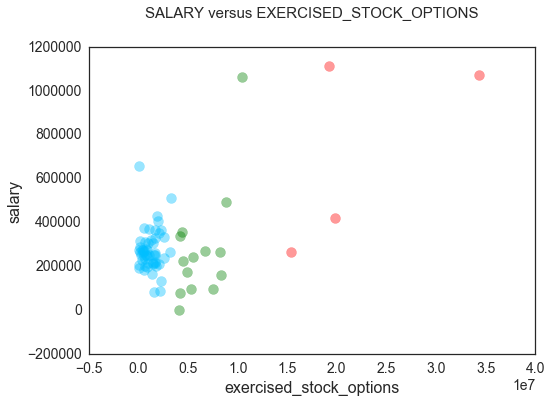

In [388]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 

features_list = [poi, feature_2, feature_1] #
data = featureFormat(data_dict, features_list, remove_any_zeroes=True)
_, finance_features = targetFeatureSplit( data )

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_init=100, max_iter=500)
km.fit(finance_features)
pred = km.predict(finance_features)


for i, point in enumerate(finance_features):
    x = point[0]
    y = point[1]
    plt.scatter(x, y, color = colors[pred[i]], s=100, marker = 'o', alpha = 0.40)
    
plt.xlabel(features_list[1])
plt.ylabel(features_list[2])
#plt.grid(True)
plt.title(features_list[2].upper()+' versus '+features_list[1].upper(), y=1.08)
plt.show()

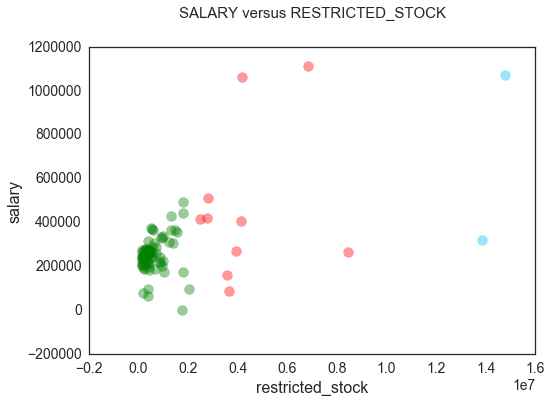

In [389]:
from sklearn.preprocessing import MinMaxScaler 

features_list = [poi, feature_3, feature_1]
data = featureFormat(data_dict, features_list, remove_any_zeroes=True)

_, finance_features = targetFeatureSplit( data )


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_init=100, max_iter=500)
km.fit(finance_features)
pred = km.predict(finance_features)



for i, point in enumerate(finance_features):
    x = point[0]
    y = point[1]
    ax = plt.scatter(x, y, color = colors[pred[i]], s=100, marker = 'o', alpha = 0.40)
    
plt.xlabel(features_list[1])
plt.ylabel(features_list[2])
#plt.grid(True)
plt.title(features_list[2].upper()+' versus '+features_list[1].upper(), y=1.08)
plt.show()